In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost
import sklearn
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.formula.api as smf 
import statsmodels.api as sm


In [1]:
#Using the sales.csv, we will write code to show effects of interactions, if any, on the linear regression model to predict the total_sales for a new area using given sales from three areas.
from google.colab import files
 
 
uploaded = files.upload()

Saving sales.csv to sales.csv


In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['sales.csv']))
df
#creating a df for sales data

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74
...,...,...,...,...,...
2995,3995,0.20,0.00,0.07,0.49
2996,3996,0.28,0.00,0.04,0.49
2997,3997,0.00,0.49,0.00,0.49
2998,3998,0.07,0.09,0.07,0.49


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3000 non-null   int64  
 1   area1_sales  3000 non-null   float64
 2   area2_sales  3000 non-null   float64
 3   area3_sales  3000 non-null   float64
 4   total_sales  3000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.3 KB


In [6]:
df.isnull().sum()

Unnamed: 0     0
area1_sales    0
area2_sales    0
area3_sales    0
total_sales    0
dtype: int64

In [7]:
#create x and y variables
x = df[['area1_sales', 'area2_sales', 'area3_sales']]
y = df[['total_sales']]

In [8]:
#Splitting data into train and test subsets
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size= 0.25 , random_state=42)

In [9]:
#Scaling data using Robust Scalar

ro_scaler=RobustScaler()
x_train=ro_scaler.fit_transform(x_train)
x_test=ro_scaler.fit_transform(x_test)

In [28]:
reg=LinearRegression()
result= reg.fit(x_train,y_train)

In [11]:
print(reg.score(x_test,y_test))
print(reg.intercept_)
print(reg.coef_)


0.560710161280545
[0.76212315]
[[0.30837903 0.05992989 0.12899234]]


In [12]:
d=pd.DataFrame(reg.coef_, columns=["area1_sales","area2_sales", "area3_sales"])
d

,area1_sales,area2_sales,area3_sales
0,0.308379,0.05993,0.128992


In [30]:
print(result.intercept_, result.coef_, result.score(x, y))

[0.76212315] [[0.30837903 0.05992989 0.12899234]] 0.2843949731740293


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
print("The r squared on the fitted model is 0.28. This hints that the model does not do a good job in predicting the total sales")

In [31]:
print("We will develop a second model using interaction terms between the sales in areas 1,2 and 3 to predict the total sales")
#interaction terms and appending it to dataframe
df['area1xarea2'] = df.area1_sales * df.area2_sales
df['area2xarea3'] = df.area2_sales * df.area3_sales
df['area1xarea3'] = df.area1_sales * df.area3_sales
df['area1xarea2xarea3'] = df.area1_sales * df.area2_sales * df.area3_sales
df

We will develop a second model using interaction terms between the sales in areas 1,2 and 3 to predict the total sales


,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales,area1xarea2,area2xarea3,area1xarea3,area1xarea2xarea3
0,1000,0.79,0.80,0.02,1.75,0.6320,0.0160,0.0158,0.012640
1,1001,0.83,0.08,0.18,1.75,0.0664,0.0144,0.1494,0.011952
2,1002,0.85,0.01,0.22,1.75,0.0085,0.0022,0.1870,0.001870
3,1003,1.25,0.00,0.03,1.75,0.0000,0.0000,0.0375,0.000000
4,1004,0.72,0.04,0.10,1.74,0.0288,0.0040,0.0720,0.002880
...,...,...,...,...,...,...,...,...,...
2995,3995,0.20,0.00,0.07,0.49,0.0000,0.0000,0.0140,0.000000
2996,3996,0.28,0.00,0.04,0.49,0.0000,0.0000,0.0112,0.000000
2997,3997,0.00,0.49,0.00,0.49,0.0000,0.0000,0.0000,0.000000
2998,3998,0.07,0.09,0.07,0.49,0.0063,0.0063,0.0049,0.000441


In [32]:
#repeating the steps done earlier develop a linear regression model using the interaction terms created 
x2 = df[['area1_sales', 'area2_sales', 'area3_sales', 'area1xarea2', 'area2xarea3', 'area1xarea3', 'area1xarea2xarea3']]
y2 = df[['total_sales']]

In [33]:
x2_train , x2_test , y2_train , y2_test = train_test_split(x2, y2, test_size= 0.20 , random_state=42)

In [34]:
ro_scaler=RobustScaler()
x2_train=ro_scaler.fit_transform(x2_train)
x2_test=ro_scaler.fit_transform(x2_test)

In [35]:
reg = LinearRegression()
reg.fit(x2_train,y2_train)
predictsales = reg.predict(x2_test)
print(reg.coef_)

[[2.74126723e-01 5.29024297e-02 1.00179015e-01 1.56812450e-03
  1.41183288e-05 3.29607431e-02 6.40790200e-03]]


In [36]:
#create a glm model with all interactions
formula = 'total_sales ~ area1_sales + area2_sales + area3_sales + area1_sales*area2_sales + area2_sales*area3_sales + area1_sales*area2_sales*area3_sales'
model4 = smf.glm(formula = formula, data = df)
result4 = model4.fit()
print(result4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            total_sales   No. Observations:                 3000
Model:                            GLM   Df Residuals:                     2992
Model Family:                Gaussian   Df Model:                            7
Link Function:               identity   Scale:                        0.033745
Method:                          IRLS   Log-Likelihood:                 830.59
Date:                Mon, 23 Jan 2023   Deviance:                       100.96
Time:                        01:04:31   Pearson chi2:                     101.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [38]:

null= result4.null_deviance

In [39]:
deviance= result4.deviance #residual deviance

In [40]:
#calculating the r sqaured
(null-deviance)/null

0.7155641658804521

In [ ]:
print("This time, the r squared of our model is 0.71 which is a significant improvement from our previous model without interaction terms. This is evidence that there does exist interaction between sales in sreas 1,2 and 3 that affect the total sales")

In [41]:
#Now, I develop a full Logistic Regression Model using customer.csv 
#to predict whether the customer will purchase the product. 
#Also train trimmed logistic regression models (Trimmed over features in the data). 
#Compute the "in-sample R2" (pseudo) for the models you train and compare the models based on this metric.

from google.colab import files
 
 
uploaded = files.upload()

Saving customer.csv to customer.csv


In [42]:
import io
customer = pd.read_csv(io.BytesIO(uploaded['customer.csv']))
customer

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [54]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
 4   Gender_Male      400 non-null    uint8
dtypes: int64(4), uint8(1)
memory usage: 13.0 KB


In [43]:
#creating dummies for the categorical x variable Gender. Our base dummy will be female (0)
customer = pd.get_dummies(customer,columns =['Gender'], drop_first = True)
customer

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [45]:
#full model using all 3 x variables
formula_logit = 'Purchased ~ Gender_Male + EstimatedSalary + Age'
model_logit = smf.logit(formula = formula_logit, data=customer)



In [46]:
result = model_logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.344804
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.4711
Time:                        01:13:54   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     -9.405      0.000     -15.448     -10.120
Gender_Male   

In [47]:
#trimmed model 1

formula_logit2 = 'Purchased ~ Gender_Male + EstimatedSalary'

model_logit2 = smf.logit(formula = formula_logit2, data = customer)

result2 = model_logit2.fit()
print(result2.summary())

Optimization terminated successfully.
         Current function value: 0.584449
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.1036
Time:                        01:14:04   Log-Likelihood:                -233.78
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 1.866e-12
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2720      0.310     -7.324      0.000      -2.880      -1.664
Gender_Male   

In [48]:
#trimmed model 2

formula_logit3 = 'Purchased ~ Gender_Male + Age'

model_logit3 = smf.logit(formula = formula_logit3, data = customer)

result3 = model_logit3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.420177
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.3555
Time:                        01:14:06   Log-Likelihood:                -168.07
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.420e-41
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -8.1154      0.814     -9.972      0.000      -9.710      -6.520
Gender_Male     0.0947    

In [49]:
#trimmed model 3

formula_logit4 = 'Purchased ~ EstimatedSalary + Age'

model_logit4 = smf.logit(formula = formula_logit4, data = customer)

result4 = model_logit4.fit()
print(result4.summary())

Optimization terminated successfully.
         Current function value: 0.346314
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      397
Method:                           MLE   Df Model:                            2
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.4688
Time:                        01:14:09   Log-Likelihood:                -138.53
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 7.995e-54
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.4340      1.300     -9.566      0.000     -14.982      -9.886
EstimatedSalar

In [50]:
#For the Logistic Regression models trained above, I pick the best model wrt to the in-sample R2 
#and give my interpretation of the model’s coefficients

print("Response: R square increases everytime you add an extra independent or x variable to the model as it will help explain some deviance. The full model having a higher in-sample R square compared to the trim models, we would have to select the full model as the best model (wrt to in sample R2)")


Response: R square increases everytime you add an extra independent or x variable to the model as it will help explain some deviance. The full model having a higher in-sample R square compared to the trim models, we would have to select the full model as the best model (wrt to in sample R2)


In [51]:
#full model coeff interp
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  400
Model:                          Logit   Df Residuals:                      396
Method:                           MLE   Df Model:                            3
Date:                Mon, 23 Jan 2023   Pseudo R-squ.:                  0.4711
Time:                        01:14:29   Log-Likelihood:                -137.92
converged:                       True   LL-Null:                       -260.79
Covariance Type:            nonrobust   LLR p-value:                 5.488e-53
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     -9.405      0.000     -15.448     -10.120
Gender_Male         0.3338      0.305      1.094      0.274      -0.264       0.932
EstimatedSalary  3.644e-05   5.4

In [82]:
print("As estimated salary increases by 1 unit, the odds of purchase will increase by exp(0.3644e-05) or by ~1.00003, keeping Age and Gender constant")
print("As age increases by 1 unit, the odds of purchase will increase by exp(0.2370) or by 1.26, keeping Est Salary and Gender constant")
print("The probability that a woman will purchase is 0.0000028")
print("The negative coefficient for Gender_Male in the  regression indicates that for a fixed value of Estimated salary, Males are less likely to purchase than females. However, since the p value of the differential coefficeint is not significant, we can say that the difference in probability of purchase of males and females keeping estimated salary constant is not statistically significant")

As estimated salary increases by 1 unit, the odds of purchase will increase by exp(0.3644e-05) or by ~1.00003, keeping Age and Gender constant
As age increases by 1 unit, the odds of purchase will increase by exp(0.2370) or by 1.26, keeping Est Salary and Gender constant
The probability that a woman will purchase is 0.0000028
The negative coefficient for Gender_Male in the  regression indicates that for a fixed value of Estimated salary, Males are less likely to purchase than females. However, since the p value of the differential coefficeint is not significant, we can say that the difference in probability of purchase of males and females keeping estimated salary constant is not statistically significant


In [56]:
sum(customer.Purchased == 0) #checking if data is balanced. count of not purchased data


143

In [ ]:
sum(customer.Purchased == 1) #checking if data is balanced. count of purchased data

In [57]:
#metrics 
print("Firstly the above model is tested only on in sample data which limits the conclusion we can draw about its true performance. Secondly, accuracy only tells us how many successful predictions we made.  For classification models, for accuracy to be a good metric, the dataset needs to be balance. Our dataset is unbalanced, with 144 data points for purchased and 257 (over 70% more) for not purchased, which could also be creating a bias as the importance given to the 0s and the 1s is  not the same.")
print("Alternate better metrics are precision and recall to identify what proportion of the positive predictions were actually positive and what proportion was identified correctly.")

Firstly the above model is tested only on in sample data which limits the conclusion we can draw about its true performance. Secondly, accuracy only tells us how many successful predictions we made.  For classification models, for accuracy to be a good metric, the dataset needs to be balance. Our dataset is unbalanced, with 144 data points for purchased and 257 (over 70% more) for not purchased, which could also be creating a bias as the importance given to the 0s and the 1s is  not the same.
Alternate metrics are precision and recall


In [ ]:
#plotting 



In [58]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np

In [59]:
from google.colab import files
 
 
uploaded = files.upload()

Saving customer.csv to customer (1).csv


In [100]:
import io
cust = pd.read_csv(io.BytesIO(uploaded['customer.csv'])) #importing the dataset again


In [101]:
cust = pd.get_dummies(cust,columns =['Gender'], drop_first = True) #creating dummies for categorical
cust

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [69]:
X = cust[['Age','Gender_Male']]
y = cust['Purchased']


In [78]:
model_6 = LogisticRegression(solver='lbfgs').fit(X, y)

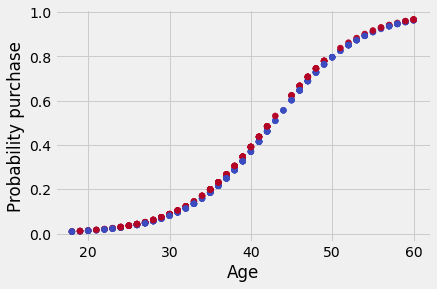

In [95]:
plt.scatter(cust['Age'], model_6.predict_proba(X)[:,1], c=cust['Gender_Male'], cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Probability purchase')
plt.show()

In [86]:
print("The two colored dots representing males and females and pretty much overlapping. Gender and age do not seem to interact to affect prob of purchase")

Gender and age do not seem to interact to affect prob of purchase


In [89]:
from statsmodels.graphics.factorplots import interaction_plot

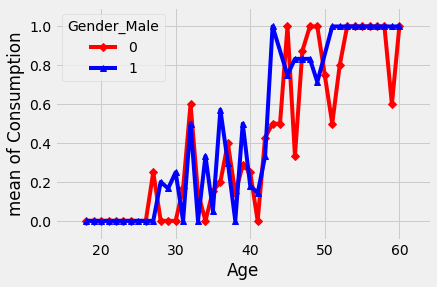

In [98]:
fig = interaction_plot(cust['Age'], cust['Gender_Male'], cust['Purchased'],
             colors=['red','blue'], markers=['D','^'], ylabel='Consumption', xlabel='Age')


import matplotlib.pyplot as plt
plt.show()

In [102]:
print("From the above plot, seems like till the age of 40, the purchase probability for both genders follows a similar pattersn, so no interaction. From 40 to 60, for females, the variation in purchase probability is  higher than males based")

From the above plot, seems like till the age of 40, the purchase probability for both genders follows a similar pattersn, so no interaction. From 40 to 60, for females, the variation in purchase probability is  higher than males based


In [103]:
"#The following plots show effect of Income and Change in savings on Likelihood of buying a house. 

print("Response: In plot C, the slop for 3 income lines seem to be the same as the lines are parellel. This implies average savings and income level do not interact to affect likelihood so we can omit the interaction term for c")

print("In plot b, we see that there is interaction between savings and income level. The intercept for high income is higher than that of low income as seen by the plot, as savings increase, likelihood of buying house increases for low income and decreases for high income.")

print("In plot a, the slope seem to be different but we would have to check the p value of the interaction term to see if they are statistically different to know whether to include the term in our regression")

SyntaxError: ignored